# S3DXRD processing first step: dataset creation, segmentation and peak labelling

Written by James Ball, Haixing Fang and Jon Wright

Last updated: 21/02/2025

Outside ESRF: download [install_ImageD11_from_git.py](https://github.com/FABLE-3DXRD/ImageD11/tree/master/ImageD11/nbGui/install_ImageD11_from_git.py), and update the path in the next cell:

In [1]:
exec(open('/data/id11/nanoscope/install_ImageD11_from_git.py').read())

In [2]:
# this cell is tagged with 'parameters'
# to view the tag, select the cell, then find the settings gear icon (right or left sidebar) and look for Cell Tags

PYTHONPATH = setup_ImageD11_from_git( ) # ( os.path.join( os.environ['HOME'],'Code'), 'ImageD11_git' )

# Experts : update these files for your detector if you need to
maskfile = "/data/id11/nanoscope/Eiger/eiger_mask_E-08-0144_20240205.edf"
e2dxfile = "/data/id11/nanoscope/Eiger/e2dx_E-08-0144_20240205.edf"
e2dyfile = "/data/id11/nanoscope/Eiger/e2dy_E-08-0144_20240205.edf"
detector = 'eiger'
omegamotor = 'rot_center'
dtymotor = 'dty'

# Default segmentation options
options = { 'cut' : 1, 'pixels_in_spot' : 3, 'howmany' : 100000 }

# EXPERTS: These can be provided as papermill parameters. Users, leave these as None for now...
dataroot = None
analysisroot = None
sample = None
dataset = None

# Setting path via: 
sys.path.insert(0, /home/esrf/james1997a/Code/ImageD11 )


# Running from: /home/esrf/james1997a/Code/ImageD11/ImageD11/__init__.py


In [3]:
# Parameters
maskfile = (
    "/data/id11/inhouse2/test_data_3DXRD/S3DXRD/FeAu/pars/mask_with_gaps_E-08-0173.edf"
)
e2dxfile = (
    "/data/id11/inhouse2/test_data_3DXRD/S3DXRD/FeAu/pars/e2dx_E-08-0173_20231127.edf"
)
e2dyfile = (
    "/data/id11/inhouse2/test_data_3DXRD/S3DXRD/FeAu/pars/e2dy_E-08-0173_20231127.edf"
)
detector = "eiger"
omegamotor = "rot_center"
dtymotor = "dty"
options = {"cut": 1, "pixels_in_spot": 3, "howmany": 100000}
PYTHONPATH = "../"
dataroot = "/data/id11/inhouse2/test_data_3DXRD/S3DXRD/FeAu/RAW_DATA"
analysisroot = "/data/id11/inhouse2/test_data_3DXRD/S3DXRD/FeAu/PROCESSED_DATA/20250221_JADB/pbp_route"
sample = "FeAu_0p5_tR_nscope"
dataset = "top_200um"


In [4]:
# Import needed packages
%matplotlib ipympl
import pprint
import numpy as np
import ImageD11.sinograms.dataset
import ImageD11.sinograms.lima_segmenter
import ImageD11.sinograms.assemble_label
import ImageD11.sinograms.properties
import ImageD11.nbGui.nb_utils as utils
from ImageD11.nbGui import segmenter_gui

In [5]:
# Set up the file paths. Edit this if you are not at ESRF or not using the latest data policy.
if dataroot is None:
    dataroot, analysisroot = segmenter_gui.guess_ESRF_paths() 

if len(dataroot)==0:
    print("Please fix in the dataroot and analysisroot folder names above!!")
    
print('dataroot =',repr(dataroot))
print('analysisroot =',repr(analysisroot))

dataroot = '/data/id11/inhouse2/test_data_3DXRD/S3DXRD/FeAu/RAW_DATA'
analysisroot = '/data/id11/inhouse2/test_data_3DXRD/S3DXRD/FeAu/PROCESSED_DATA/20250221_JADB/pbp_route'


In [6]:
# List the samples available:
segmenter_gui.printsamples(dataroot)

Samples:
	 .ipynb_checkpoints
	FeAu_0p5_tR_nscope


In [7]:
# USER: Decide which sample
if sample is None:
    sample = 'FeAu_0p5_tR_nscope'

In [8]:
# List the datasets for that sample:
segmenter_gui.printdatasets( dataroot, sample )

Datsets:
	 top_200um
	top_250um


In [9]:
# USER: Decide which dataset
if dataset is None:
    dataset = "top_100um"

## Example demo to see how a frame is segmented for one dataset:

In [10]:
# create ImageD11 dataset object
ds = ImageD11.sinograms.dataset.DataSet(dataroot=dataroot,
                                        analysisroot=analysisroot,
                                        sample=sample,
                                        dset=dataset,
                                        detector=detector,
                                        omegamotor=omegamotor,
                                        dtymotor=dtymotor
                                       )
ds.import_all()  # Can use scans = [f'{scan}.1' for scan in range(1,102)] )
ds.maskfile = maskfile
ds.e2dxfile = e2dxfile
ds.e2dyfile = e2dyfile
ds.save()

Using frame 488 from scan 138.1


interactive(children=(IntSlider(value=1, description='Cut:', max=200), IntSlider(value=3, description='Pixels …

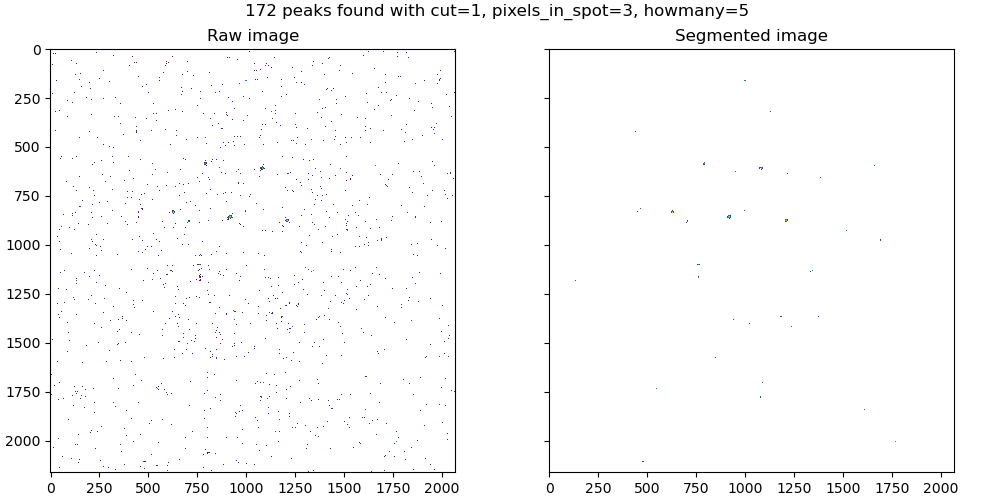

In [11]:
ui = segmenter_gui.SegmenterGui(ds, **options )

In [12]:
options = ui.getopts()

options =  {'cut': 1, 'pixels_in_spot': 3, 'howmany': 100000}


In [13]:
# create batch file to send to SLURM cluster
sbat = ImageD11.sinograms.lima_segmenter.setup(ds.dsfile, **ui.getopts(), pythonpath=PYTHONPATH)
if sbat is None:
    raise ValueError("This scan has already been segmented!")
print(sbat)

options =  {'cut': 1, 'pixels_in_spot': 3, 'howmany': 100000}
cut 1
howmany 100000
pixels_in_spot 3
maskfile /data/id11/inhouse2/test_data_3DXRD/S3DXRD/FeAu/pars/mask_with_gaps_E-08-0173.edf
bgfile 
cores_per_job 8
files_per_core 8
total files to process 275 done 0
# Opened mask /data/id11/inhouse2/test_data_3DXRD/S3DXRD/FeAu/pars/mask_with_gaps_E-08-0173.edf  93.93 % pixels are active
/data/id11/inhouse2/test_data_3DXRD/S3DXRD/FeAu/PROCESSED_DATA/20250221_JADB/pbp_route/FeAu_0p5_tR_nscope/FeAu_0p5_tR_nscope_top_200um/slurm/lima_segmenter_slurm.sh


In [14]:
utils.slurm_submit_and_wait(sbat, 60)

Submitted batch job 21521104
21521104
Slurm job not finished! Waiting 60 seconds...


Slurm job not finished! Waiting 60 seconds...


Slurm job finished!


In [15]:
# label sparse peaks

ImageD11.sinograms.assemble_label.main(ds.dsfile)

Harvesting /data/id11/inhouse2/test_data_3DXRD/S3DXRD/FeAu/RAW_DATA/FeAu_0p5_tR_nscope/FeAu_0p5_tR_nscope_top_200um/FeAu_0p5_tR_nscope_top_200um.h5: 1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1, 10.1, 11.1, 12.1, 13.1, 14.1, 15.1, 16.1, 

17.1, 18.1, 19.1, 20.1, 21.1, 22.1, 23.1, 24.1, 25.1, 26.1, 27.1, 28.1, 29.1, 30.1, 

31.1, 32.1, 33.1, 34.1, 35.1, 36.1, 37.1, 38.1, 39.1, 40.1, 41.1, 42.1, 43.1, 44.1, 45.1, 46.1, 47.1, 

48.1, 49.1, 50.1, 51.1, 52.1, 53.1, 54.1, 55.1, 56.1, 57.1, 58.1, 59.1, 60.1, 

61.1, 62.1, 63.1, 64.1, 65.1, 66.1, 67.1, 68.1, 69.1, 70.1, 71.1, 

72.1, 73.1, 74.1, 75.1, 76.1, 77.1, 78.1, 79.1, 80.1, 81.1, 82.1, 83.1, 84.1, 

85.1, 86.1, 87.1, 88.1, 89.1, 90.1, 91.1, 92.1, 93.1, 94.1, 95.1, 96.1, 97.1, 98.1, 99.1, 100.1, 101.1, 102.1, 103.1, 

104.1, 105.1, 106.1, 107.1, 108.1, 109.1, 110.1, 111.1, 112.1, 113.1, 114.1, 115.1, 116.1, 

117.1, 118.1, 119.1, 120.1, 121.1, 122.1, 123.1, 124.1, 125.1, 126.1, 127.1, 128.1, 129.1, 130.1, 131.1, 132.1, 133.1, 134.1, 135.1, 

136.1, 137.1, 138.1, 139.1, 140.1, 141.1, 142.1, 143.1, 144.1, 145.1, 146.1, 147.1, 148.1, 

149.1, 150.1, 151.1, 152.1, 153.1, 154.1, 155.1, 156.1, 157.1, 158.1, 159.1, 160.1, 161.1, 162.1, 163.1, 164.1, 165.1, 166.1, 167.1, 

168.1, 169.1, 170.1, 171.1, 172.1, 173.1, 174.1, 175.1, 176.1, 177.1, 178.1, 179.1, 180.1, 

181.1, 182.1, 183.1, 184.1, 185.1, 186.1, 187.1, 188.1, 189.1, 190.1, 191.1, 192.1, 193.1, 194.1, 195.1, 196.1, 197.1, 198.1, 199.1, 

200.1, 201.1, 202.1, 203.1, 204.1, 205.1, 206.1, 207.1, 208.1, 209.1, 210.1, 211.1, 

212.1, 213.1, 214.1, 215.1, 216.1, 217.1, 218.1, 219.1, 220.1, 221.1, 222.1, 223.1, 224.1, 225.1, 226.1, 227.1, 228.1, 229.1, 230.1, 231.1, 

232.1, 233.1, 234.1, 235.1, 236.1, 237.1, 238.1, 239.1, 240.1, 241.1, 242.1, 243.1, 

244.1, 245.1, 246.1, 247.1, 248.1, 249.1, 250.1, 251.1, 252.1, 253.1, 254.1, 255.1, 256.1, 257.1, 258.1, 259.1, 260.1, 261.1, 262.1, 263.1, 

264.1, 265.1, 266.1, 267.1, 268.1, 269.1, 270.1, 271.1, 272.1, 273.1, 274.1, 275.1, 


Loading pixels: 1.1, 2.1, 

3.1, 4.1, 

5.1, 6.1, 

7.1, 8.1, 

9.1, 10.1, 

11.1, 12.1, 

13.1, 14.1, 

15.1, 16.1, 

17.1, 18.1, 

19.1, 20.1, 

21.1, 22.1, 

23.1, 24.1, 

25.1, 26.1, 

27.1, 28.1, 

29.1, 30.1, 

31.1, 32.1, 

33.1, 34.1, 

35.1, 36.1, 

37.1, 

38.1, 39.1, 

40.1, 

41.1, 42.1, 

43.1, 

44.1, 45.1, 

46.1, 

47.1, 48.1, 

49.1, 

50.1, 51.1, 

52.1, 

53.1, 54.1, 

55.1, 

56.1, 

57.1, 58.1, 

59.1, 

60.1, 61.1, 

62.1, 

63.1, 

64.1, 65.1, 

66.1, 

67.1, 68.1, 

69.1, 70.1, 71.1, 

72.1, 73.1, 74.1, 

75.1, 76.1, 77.1, 

78.1, 79.1, 80.1, 

81.1, 82.1, 83.1, 

84.1, 85.1, 86.1, 

87.1, 88.1, 89.1, 

90.1, 91.1, 92.1, 

93.1, 94.1, 95.1, 

96.1, 97.1, 98.1, 

99.1, 100.1, 

101.1, 102.1, 103.1, 

104.1, 105.1, 106.1, 

107.1, 108.1, 109.1, 

110.1, 111.1, 112.1, 

113.1, 

114.1, 115.1, 116.1, 

117.1, 118.1, 

119.1, 120.1, 121.1, 

122.1, 123.1, 124.1, 

125.1, 126.1, 127.1, 

128.1, 129.1, 130.1, 

131.1, 132.1, 133.1, 

134.1, 135.1, 136.1, 

137.1, 138.1, 139.1, 

140.1, 141.1, 142.1, 

143.1, 144.1, 145.1, 

146.1, 147.1, 148.1, 

149.1, 150.1, 151.1, 

152.1, 153.1, 154.1, 

155.1, 156.1, 157.1, 

158.1, 159.1, 160.1, 

161.1, 162.1, 163.1, 

164.1, 165.1, 166.1, 

167.1, 168.1, 169.1, 

170.1, 171.1, 172.1, 

173.1, 174.1, 175.1, 

176.1, 177.1, 178.1, 

179.1, 180.1, 181.1, 

182.1, 183.1, 184.1, 

185.1, 186.1, 187.1, 

188.1, 189.1, 190.1, 

191.1, 192.1, 193.1, 

194.1, 195.1, 196.1, 

197.1, 198.1, 199.1, 

200.1, 201.1, 202.1, 

203.1, 204.1, 205.1, 

206.1, 207.1, 208.1, 

209.1, 210.1, 211.1, 

212.1, 213.1, 214.1, 

215.1, 216.1, 217.1, 

218.1, 219.1, 220.1, 

221.1, 222.1, 223.1, 

224.1, 225.1, 226.1, 

227.1, 228.1, 229.1, 

230.1, 231.1, 

232.1, 233.1, 234.1, 

235.1, 236.1, 237.1, 

238.1, 239.1, 240.1, 

241.1, 242.1, 243.1, 244.1, 

245.1, 246.1, 247.1, 248.1, 

249.1, 250.1, 251.1, 252.1, 

253.1, 254.1, 255.1, 256.1, 257.1, 

258.1, 259.1, 260.1, 261.1, 262.1, 263.1, 

264.1, 265.1, 266.1, 267.1, 268.1, 269.1, 270.1, 271.1, 272.1, 

273.1, 274.1, 275.1, 


In [16]:
# generate peaks table

ImageD11.sinograms.properties.main(ds.dsfile, options={'algorithm': 'lmlabel', 'wtmax': 70000, 'save_overlaps': False})

read ds /data/id11/inhouse2/test_data_3DXRD/S3DXRD/FeAu/PROCESSED_DATA/20250221_JADB/pbp_route/FeAu_0p5_tR_nscope/FeAu_0p5_tR_nscope_top_200um/FeAu_0p5_tR_nscope_top_200um_dataset.h5 : 0.041023 /s
Nscans 275
Options {'algorithm': 'lmlabel', 'wtmax': 70000, 'save_overlaps': False, 'nproc': 39}


  0%|                                                                                                                                                                                                                                                   | 0/313 [00:00<?, ?it/s]

  0%|▊                                                                                                                                                                                                                                          | 1/313 [00:01<08:44,  1.68s/it]

  1%|█▌                                                                                                                                                                                                                                         | 2/313 [00:01<03:56,  1.31it/s]

  2%|████▌                                                                                                                                                                                                                                      | 6/313 [00:01<01:00,  5.11it/s]

  3%|██████▊                                                                                                                                                                                                                                    | 9/313 [00:02<00:37,  8.11it/s]

  4%|█████████▋                                                                                                                                                                                                                                | 13/313 [00:02<00:24, 12.20it/s]

  6%|██████████████▉                                                                                                                                                                                                                           | 20/313 [00:02<00:13, 21.53it/s]

 11%|██████████████████████████▏                                                                                                                                                                                                               | 35/313 [00:02<00:06, 45.64it/s]

 15%|███████████████████████████████████▉                                                                                                                                                                                                      | 48/313 [00:02<00:04, 63.41it/s]

 19%|███████████████████████████████████████████▎                                                                                                                                                                                              | 58/313 [00:02<00:05, 46.10it/s]

 21%|█████████████████████████████████████████████████▎                                                                                                                                                                                        | 66/313 [00:02<00:04, 51.16it/s]

 25%|██████████████████████████████████████████████████████████▎                                                                                                                                                                               | 78/313 [00:03<00:03, 64.58it/s]

 28%|█████████████████████████████████████████████████████████████████                                                                                                                                                                         | 87/313 [00:03<00:03, 67.26it/s]

 31%|███████████████████████████████████████████████████████████████████████▊                                                                                                                                                                  | 96/313 [00:03<00:03, 66.44it/s]

 33%|█████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                           | 104/313 [00:03<00:03, 52.33it/s]

 35%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                      | 111/313 [00:03<00:04, 50.46it/s]

 40%|████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                            | 124/313 [00:03<00:02, 66.32it/s]

 42%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                      | 132/313 [00:03<00:02, 63.48it/s]

 45%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                | 141/313 [00:04<00:02, 68.45it/s]

 48%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                          | 149/313 [00:04<00:03, 53.18it/s]

 50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                    | 156/313 [00:04<00:03, 51.04it/s]

 54%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                           | 169/313 [00:04<00:02, 65.76it/s]

 57%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                     | 177/313 [00:04<00:02, 60.07it/s]

 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                | 184/313 [00:04<00:02, 61.83it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                          | 191/313 [00:05<00:02, 50.04it/s]

 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 197/313 [00:05<00:02, 47.00it/s]

 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 211/313 [00:05<00:01, 65.72it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 219/313 [00:05<00:01, 60.72it/s]

 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                | 226/313 [00:05<00:01, 54.53it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 232/313 [00:05<00:01, 43.63it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 244/313 [00:05<00:01, 54.50it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 251/313 [00:06<00:01, 49.92it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 259/313 [00:06<00:01, 52.37it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 265/313 [00:06<00:01, 42.26it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 273/313 [00:06<00:00, 48.87it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 280/313 [00:06<00:00, 53.07it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 286/313 [00:06<00:00, 42.52it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 291/313 [00:07<00:00, 40.61it/s]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 296/313 [00:07<00:00, 37.17it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 305/313 [00:07<00:00, 47.56it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 311/313 [00:07<00:00, 38.04it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:07<00:00, 40.67it/s]

  0%|                                                                                                                                                                                                                                                    | 0/39 [00:00<?, ?it/s]

  5%|████████████                                                                                                                                                                                                                                | 2/39 [00:00<00:01, 18.78it/s]

 26%|████████████████████████████████████████████████████████████▎                                                                                                                                                                              | 10/39 [00:00<00:00, 53.76it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 38/39 [00:00<00:00, 141.06it/s]

19112858 label and pair : 8.407690 /s


...................

........................

.........................

..........................

..........................

..........................

.........................

..........................

...........

3304692 connected components : 2.371540 /s


write hdf5 : 0.341861 /s
Trying to clean up shared memory


# Finished segmenting!

You can now choose between two different indexing routes: tomographic (tomo) and point-by-point (pbp).  
Tomo gives you better grain shapes, but can't handle highly deformed samples.  
Point-by-point can only give you convex grain shapes (less accurate) but can handle high levels of deformation.  
Both techniques will join back together during the strain refinement stage (notebook 3).  
Therefore notebooks 4 and onwards should work from either the tomo or pbp route.